In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
# Assume tar.gz file to be extracted at project directory.
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

In [ ]:
# (X_train, y_train), (X_test, y_test) = dict.load_data()
print(dict)

<class 'dict'>


In [ ]:
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", 
"deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
class_names[int(y_train[0])]

'frog'

'truck'

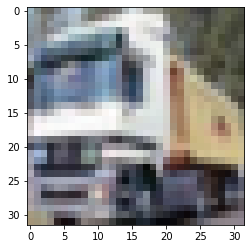

In [ ]:
plt.imshow(X_train[1], cmap='gray')
class_names[int(y_train[1])]

In [ ]:
model = keras.models.Sequential()

## input layer  
model.add(keras.layers.Flatten(input_shape=[32,32, 3]))

## first and second hidden layers
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))

## output later (same as number of classes)
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 300)               307500    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 338,610
Trainable params: 338,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Hidden1 = model.layers[1]

In [ ]:
weights, biases = Hidden1.get_weights()

In [ ]:
weights

array([[ 0.03468666,  0.01520509, -0.00883617, ...,  0.01411853,
         0.03896495,  0.05491541],
       [-0.0587692 , -0.04887493, -0.02074859, ..., -0.01851254,
        -0.01485252,  0.01122021],
       [ 0.061928  , -0.01603653,  0.05964556, ...,  0.03476433,
         0.00278488,  0.03145169],
       ...,
       [ 0.02213206,  0.04262713,  0.0322758 , ...,  0.01601781,
         0.0036517 ,  0.05838753],
       [-0.04753831,  0.05560283,  0.06101219, ..., -0.04332335,
        -0.06579959,  0.00690479],
       [-0.01927796, -0.00735502, -0.06256748, ..., -0.01153614,
         0.06207931, -0.05187101]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [96]:
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
    )

In [97]:
history = model.fit(X_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 95s 61ms/step - loss: 2.3027 - accuracy: 0.0987
Epoch 2/30
1563/1563 [==============================] - 94s 60ms/step - loss: 2.3027 - accuracy: 0.1004
Epoch 3/30
1563/1563 [==============================] - 94s 60ms/step - loss: 2.3027 - accuracy: 0.0970
Epoch 4/30
1563/1563 [==============================] - 93s 59ms/step - loss: 2.3027 - accuracy: 0.0981
Epoch 5/30
1563/1563 [==============================] - 98s 63ms/step - loss: 2.3027 - accuracy: 0.0973
Epoch 6/30
 710/1563 [============>.................] - ETA: 53s - loss: 2.3026 - accuracy: 0.0991

KeyboardInterrupt: 

In [94]:
## change optimiser as the model's accuracy is not over 30% 
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"]
    )

In [95]:
history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 2.3028 - accuracy: 0.1003
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 3/5
1563/1563 [==============================] - 99s 63ms/step - loss: 2.3028 - accuracy: 0.0986
Epoch 4/5
1563/1563 [==============================] - 95s 61ms/step - loss: 2.3028 - accuracy: 0.1003
Epoch 5/5
1563/1563 [==============================] - 98s 62ms/step - loss: 2.3028 - accuracy: 0.0976


In [ ]:
model.compile(
    optimizer= keras.optimizers.SGD(learning_rate=0.01),
    loss= keras.losses.MeanAbsoluteError(),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 5s 3ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 2/25
1563/1563 [==============================] - 5s 3ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 3/25
1563/1563 [==============================] - 5s 3ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 4/25
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 8/25
1563/1563 [==============================] - 7s 4ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 9/25
1563/1563 [==============================] - 7s 4ms/step - loss: 4.4200 - accuracy: 0.9577
Epoch 10/25
1563/1563 [==============================] - 7s 4ms/step - loss: 4.420

In [98]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026344776153564, 0.10000000149011612]

In [ ]:
earlystopper = keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, verbose=1)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, 
                                   verbose=1, mode='max', min_lr=0.00001)

history = model.fit(x = X_train,
        y = y_train,
        batch_size = 32,
        epochs = 15,
        verbose = 1,
        callbacks=[earlystopper, reduce_lr],
    )

Epoch 1/15
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577 - lr: 0.0100
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577 - lr: 0.0100
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577 - lr: 0.0100
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577 - lr: 0.0100
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577 - lr: 0.0100
Epoch 6/15
1558/1563 [============================>.] - ETA: 0s - loss: 4.4206 - accuracy: 0.9577
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
1563/1563 [==============================] - 6s 4ms/step - loss: 4.4200 - accuracy: 0.9577 - lr: 0.0100
Epoch 6: early stopping


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 4.4200 - accuracy: 0.5178


[4.4199981689453125, 0.517799973487854]

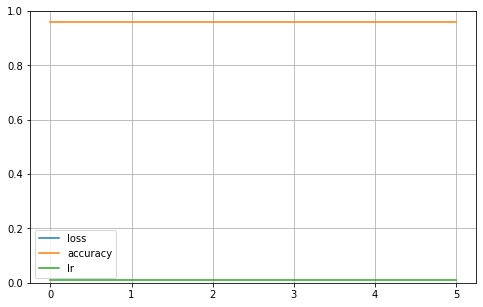

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
def create_model():
        """
        Build CNN model and Perform the following operations:

        1. Flatten the output of our base model to 1 dimension
        2. Add a fully connected layer with 1,024 hidden units and ReLU activation
        3. This time, we will go with a dropout rate of 0.2
        4. Add a final Fully Connected Sigmoid Layer
        """
        
        
        modelv2 = keras.models.Sequential()
        modelv2.add(keras.layers.Conv2D(32,  kernel_size = 3,kernel_initializer='he_normal', activation='relu', input_shape = (32, 32, 3)))
        # modelv2.add(keras.layers.normalization.BatchNormalization())
        
        modelv2.add(keras.layers.Dropout(0.2))
        
        modelv2.add(keras.layers.Conv2D(64, kernel_size = 3, kernel_initializer='he_normal', strides=1, activation='relu'))
        # modelv2.add(keras.layers.normalization.BatchNormalization())
        
        modelv2.add(keras.layers.MaxPooling2D((2, 2)))
        modelv2.add(keras.layers.Conv2D(128, kernel_size = 3, strides=1, kernel_initializer='he_normal' ,padding='same', activation='relu'))
        # modelv2.add(keras.layers.normalization.BatchNormalization())
        
        modelv2.add(keras.layers.MaxPooling2D((2, 2)))
        modelv2.add(keras.layers.Conv2D(64, kernel_size = 3,kernel_initializer='he_normal', activation='relu'))
        # modelv2.add(keras.layers.normalization.BatchNormalization())
        
        modelv2.add(keras.layers.MaxPooling2D((4, 4)))
        modelv2.add(keras.layers.Dropout(0.2))


        modelv2.add(keras.layers.Flatten())
        modelv2.add(keras.layers.Dense(256,kernel_initializer='he_normal', activation = "relu"))
        modelv2.add(keras.layers.Dropout(0.1))
        modelv2.add(keras.layers.Dense(10, kernel_initializer='glorot_uniform', activation = "softmax"))


        # Compile the modelv2
        modelv2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

        
        
#         modelv2 = Sequential()
#         modelv2.add(self.i_model)
#         modelv2.add(GlobalAveragePooling2D())
#         modelv2.add(Dense(128))
#         modelv2.add(Dropout(0.1))
#         modelv2.add(Dense(10, activation = 'softmax'))
#         modelv2.compile(optimizer=SGD(lr=0.0001, momentum=0.99, decay=0.01), loss='categorical_crossentropy', metrics=['acc'])
        return modelv2
    
    
    

def train(model):
        """
        Train the model with parameters:
        epochs = 5
        steps_per_epoch=100
        validation_steps=50
        
        """
   
        epochs=50
#         steps_per_epoch=10
#         validation_steps=5
        
            
        # We'll stop training if no improvement after some epochs
        earlystopper = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1)
        reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=5, 
                                   verbose=1, mode='max', min_lr=0.00001)
        # Save the best model during the traning
#         checkpointer = ModelCheckpoint('best_model1.h5'
#                                         ,monitor='val_acc'
#                                         ,verbose=1
#                                         ,save_best_only=True
#                                         ,save_weights_only=True)
        # Train
        training = model.fit(x=X_train,
                             y=y_train,
                             batch_size=32,
                             epochs=epochs,
                             verbose=1,
                             callbacks=[earlystopper, reduce_lr],                             
                            )
        
        # Get the best saved weights
#         model.load_weights('best_model1.h5')
        return training

    
modelv2 = create_model()

modelv2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                 

In [93]:
training=train(modelv2)
print("Trained")

Epoch 1/50
1563/1563 [==============================] - 93s 59ms/step - loss: 2.1003 - acc: 0.2096 - lr: 0.0010
Epoch 2/50
1563/1563 [==============================] - 96s 61ms/step - loss: 1.9010 - acc: 0.2968 - lr: 0.0010
Epoch 3/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8295 - acc: 0.3246 - lr: 0.0010
Epoch 4/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.7800 - acc: 0.3420 - lr: 0.0010
Epoch 5/50
1563/1563 [==============================] - 99s 63ms/step - loss: 1.7341 - acc: 0.3594 - lr: 0.0010
Epoch 6/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6844 - acc: 0.3779 - lr: 0.0010
Epoch 7/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6427 - acc: 0.3917 - lr: 0.0010
Epoch 8/50
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6148 - acc: 0.4038 - lr: 0.0010
Epoch 9/50
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5944 - acc: 0.4155 -

KeyboardInterrupt: 